# Using Linear regression to try to map a 3d plot

This Notebook demonstrates how to use TensorFlow and Matplotlib to plot a 3D loss surface for a machine learning model. We use the keras library of tensorflow and use the sequential model to train the model

In [21]:
import tensorflow as tf

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [23]:
N = 1000
X = np.random.random((N, 2))* 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])
X, Y[0:5]

(array([[-1.16586651, -0.97157864],
        [ 0.91951289,  2.89761272],
        [ 0.67932346, -0.91595945],
        ...,
        [-1.53900047, -1.16247558],
        [ 2.18040952,  1.34262525],
        [-2.66172925,  1.12075326]]),
 array([-1.66397827, -1.00890403, -0.71292895,  1.30420317, -1.23712008]))

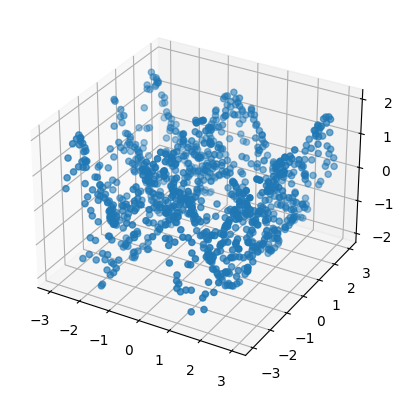

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [41]:
opt = tf.keras.optimizers.Adam(0.001)
model.compile(
    optimizer = opt,
    loss = 'mse',
)

r = model.fit(X,Y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 12/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 13/200
32/32 [=================

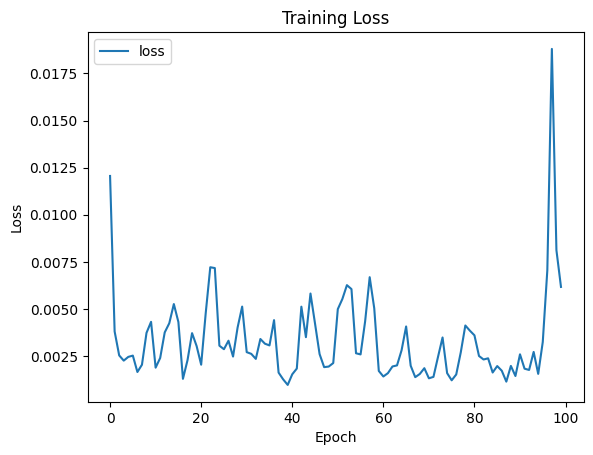

In [36]:
# Plot the training loss
plt.figure()
plt.plot(r.history['loss'], label='loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

79/79 [==============================] - 0s 2ms/step


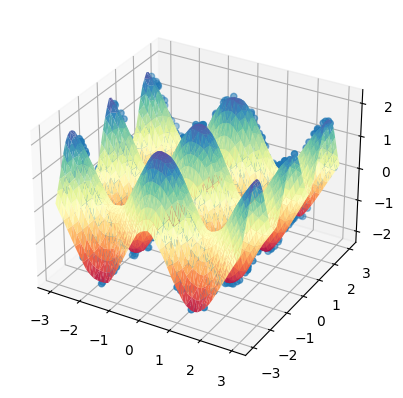

In [40]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True, cmap="Spectral")
plt.show()


32/32 [==============================] - 0s 1ms/step


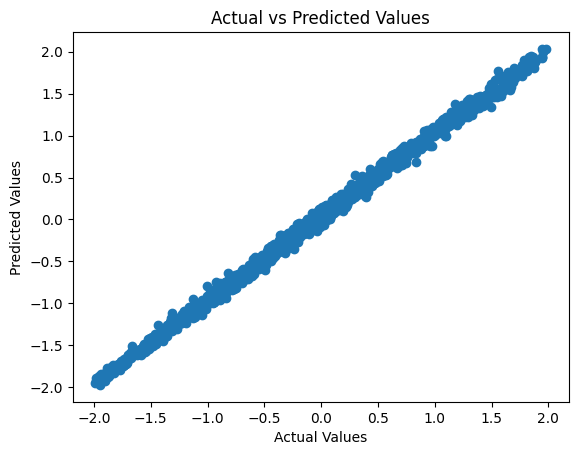

In [37]:
# Plot actual values vs predicted values
plt.figure()
plt.scatter(Y, model.predict(X))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()